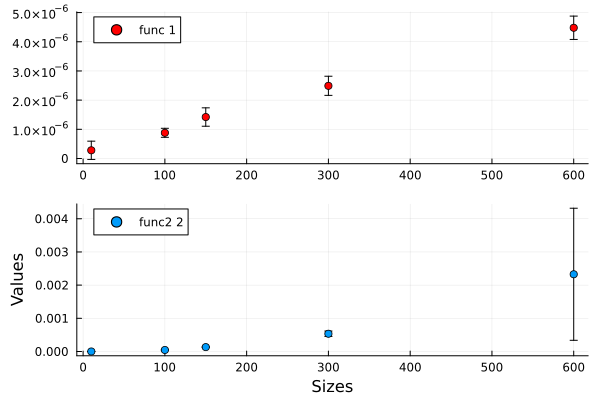

In [162]:
import Pkg
using LinearAlgebra
using DataFrames
using CSV
using Statistics
using Plots

function calculate_prod(vec_size)                             #funkcja do generowania losowych wektorów i tworzenia iloczynu skalarnego 
    v1 = rand(1:10, vec_size)
    v2 = rand(1:10, vec_size)
    result = dot(v1, v2)
    return result
end

function multiply_matrix(matrix_size)                           #Funkcja do tworzenia losowej macierzy i mnożenia jej przez wektor 
    matrix = rand(1:10, matrix_size, matrix_size)
    vector = rand(1:10, matrix_size)
    result = matrix * vector
    return result
end

function measure_times()                                        #Funkcja do mierzenia czasów, tworzenia DataFramów i rysowania wykresów 
    resultsFrame = DataFrame()                                  
    resultsFrame.functions = ["size", "func1AVG", "func1DEV", "func2AVG", "func2DEV"]

    sizes = [10, 100, 150, 300, 600]                  

    for size in sizes
        str_number = string(size)                                          #wypełnienie ResultFrame zerami
        resultsFrame[!, Symbol(str_number)] = [size, 0, 0, 0, 0]
    end
    #show(resultsFrame)

    frameToSave = DataFrame()                                               #ten dataframe będzie, zgodnie z wymogiem zadania, tym zapisywanym do pliku 


    for size in sizes
        curr_measures_func1 = Float64[]
        curr_measures_func2 = Float64[]                                     #Pętla do wypełniania "plikowego" dataframe'a pomiarami
        for i in 1:10
            elapsed_time_func1 = @elapsed begin
                calculate_prod(size)
            end
            push!(curr_measures_func1, elapsed_time_func1)
        end

        for i in 1:10
            elapsed_time_func2 = @elapsed begin
                multiply_matrix(size)
            end
            push!(curr_measures_func2, elapsed_time_func2)
        end
        str_number = string(size)
        combined_times = vcat(curr_measures_func1, curr_measures_func2)
        frameToSave[!, Symbol(str_number)] = combined_times

    end

    CSV.write("SavedFrame.csv", frameToSave)
    ReadData=CSV.read("SavedFrame.csv", DataFrame)
    #show(ReadData)

    for i in 1:length(sizes)
        curr1 = ReadData[1:10, i]
        curr2 = ReadData[11:20, i]                                      #Przepisanie wartości z "Plikowego" DataFrame'a do ResultFrame'a. Result Frame zrobiłem pomocniczo zamiast tworzyć od 
        Average1 = mean(curr1)                                          #razu wyjściowy DataFrame(ten pod tworzenie wykresu) gdyż w nim bardzo elegancko widać wyniki które chcemy zaprezentować.
        Deviation1 = std(curr1)
        Average2 = mean(curr2)
        Deviation2 = std(curr2)
        resultsFrame[!, i+1] = [sizes[i], Average1, Deviation1, Average2, Deviation2]
    end
    #show(resultsFrame)

    means1 = Array{Float64}(undef, 0)
    std1 = Array{Float64}(undef, 0)
    means2 = Array{Float64}(undef, 0)
    std2 = Array{Float64}(undef, 0)
    

    for i in 1:length(sizes)
        push!(means1, resultsFrame[2, i+1])
        push!(std1, resultsFrame[3, i+1])                                 
        push!(means2, resultsFrame[4, i+1])
        push!(std2, resultsFrame[5, i+1])
    end


    graphFrame = DataFrame(a = means1, b = std1, c = means2, d = std2, e = sizes) #Stworzenie końcowego dataframe'a (przepisanie wartości z resultsFrame do kolumn w celu umożliwienia stworzenia wykresów)
    #show(graphFrame)
    

    #scatter(graphFrame.e, graphFrame.a, yerror = graphFrame.b)
    #scatter(graphFrame.e, graphFrame.c, yerror = graphFrame.d)

    graph1 = scatter(graphFrame.e, graphFrame.a, yerror = graphFrame.b, label="func 1", color=:red)     
    graph2 = scatter(graphFrame.e, graphFrame.c, yerror = graphFrame.d, label="func2 2")

    xlabel!("Sizes")
    ylabel!("Values")               #odpowiednie nazwanie osi

    plot(graph1,graph2,layout=(2,1))  #wypisanie stworzonych wykresów
end

measure_times()



Program działa tak że mamy funkcje które generują losowe liczby do wektora i macierzy. Następnie główna funkcja do mierzenia czasu tworzy pomiary i za każdym razem wpisuje je do tymczasowego DataFrame który potem zapisuje je do pliku csv. Następnie odczytujemy dane z pliku i tworzymy nowy dataFrame do przechowywania odchyleń standardowych i średnich czasów pomiaru dla obu funkcji w celu lepszej wizualizacji zanim przepiszemy je do kolumn. Ostatnim etapem jest transponowanie wartości do trzeciego dataFarame żeby możliwe było utworzenie wykresów w zależności od kolumn. 

Krzysztof Swędzioł 418001 lab1